# Health insurance Analysis


#### Objective: predict insurance charges based on demographic and medical information, with a focus on the Body Mass Index (BMI) as a key variable

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [2]:
insurance_data = pd.read_csv("/Users/jennifervargas/Desktop/insurance.csv")
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# checking the descriptive statistics
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
#unique values in each row 
insurance_data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [5]:
# checked if there is any null value. 
insurance_data.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [6]:
#non null values in the dataset.

null_count = insurance_data.isnull().sum()
null_count

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Exploratory Data Analysis

In [7]:
# There are smoker and non-smoker people.
insurance_data["smoker"]

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [8]:
#grouping by data people that snmmoke and doesnt smoke
insurance_data[["smoker","charges"]].groupby(["smoker"], as_index = False).mean().sort_values(by = "charges",ascending = False)

,smoker,charges
1,yes,32050.231832
0,no,8434.268298


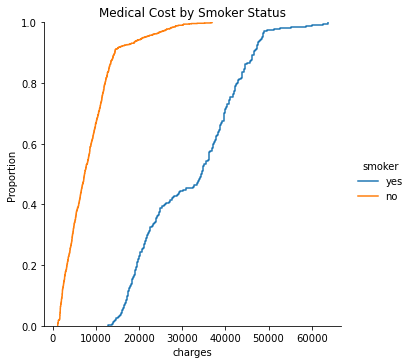

In [9]:
sns.displot(data=insurance_data, kind="ecdf",
            x="charges", hue="smoker").set(title="Medical Cost by Smoker Status")

 while medical cost for smoker people is 32050.231, for non-smoker poeple it is  8434.2682. Smokers pay more than non-smokers for medical cost.

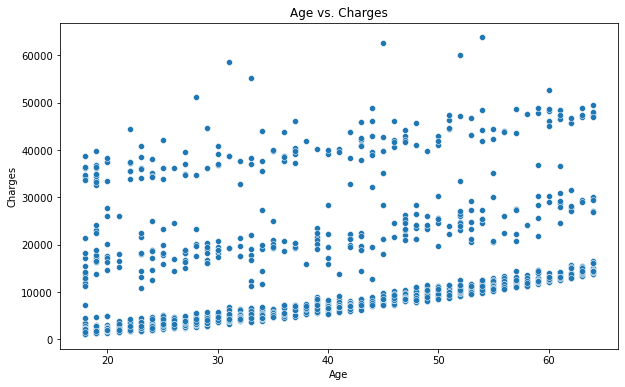

In [10]:
# Age vs Charges analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', data=insurance_data)
plt.title('Age vs. Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

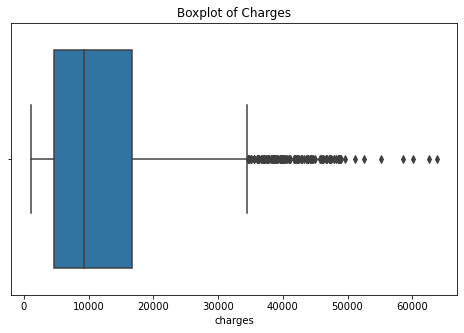

In [11]:
#Outlier Detection (for 'charges' variable)
plt.figure(figsize=(8, 5))
sns.boxplot(x=insurance_data['charges'])
plt.title('Boxplot of Charges')
plt.xlabel('charges')
plt.show()

The box covers where most charges fall. The lines (whiskers) extend to show the range of charges, excluding outliers. Here the outliers are individual points outside the whiskers, indicating unusual charge values of the insurance.

# Algorithm Analysis

In [12]:
# Convert categorical variables into integers
insurance_data = pd.get_dummies(insurance_data, columns=['sex', 'smoker', 'region'], drop_first=True)

In [13]:
print(insurance_data)

      age     bmi  children      charges  sex_male  smoker_yes  \
0      19  27.900         0  16884.92400         0           1   
1      18  33.770         1   1725.55230         1           0   
2      28  33.000         3   4449.46200         1           0   
3      33  22.705         0  21984.47061         1           0   
4      32  28.880         0   3866.85520         1           0   
...   ...     ...       ...          ...       ...         ...   
1333   50  30.970         3  10600.54830         1           0   
1334   18  31.920         0   2205.98080         0           0   
1335   18  36.850         0   1629.83350         0           0   
1336   21  25.800         0   2007.94500         0           0   
1337   61  29.070         0  29141.36030         0           1   

      region_northwest  region_southeast  region_southwest  
0                    0                 0                 1  
1                    0                 1                 0  
2                    0  

##  Linear Regression:
#### Predicting insurance charges based on demographic and medical information (BMI).

In [14]:
# Defining columns and target variable
X = insurance_data.drop(columns=['charges'])
y = insurance_data['charges']

In [15]:
# Splitting into categorical and numerical variable all columns
cat_cols = ['sex_male', 'smoker_yes','region_southwest','region_southeast','region_northwest'  ]
num_cols = ['age', 'bmi', 'children']

In [16]:
# Preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(), cat_cols)
    ])

In [17]:
# Defining the linear regression model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

In [18]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Training the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat', OneHotEncoder(),
                                                  ['sex_male', 'smoker_yes',
                                                   'region_southwest',
                                                   'region_southeast',
                                                   'region_northwest'])])),
                ('regressor', LinearRegression())])

In [20]:
# Making predictions on the testing data
y_pred = model.predict(X_test)


In [21]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 33562118.81686984
Root Mean Squared Error: 5793.282214502401


The MSE is approximately 33,562,118.82. This means that, on average, the squared difference between each predicted insurance charge and its corresponding actual charge is around 33,562,118.82.

RMSE is approximately 5,793.28. This means that, on average, the difference between each predicted insurance charge and its corresponding actual charge is around $5,793.28.

In [22]:
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.7838171140313099


The linear regression model explains about 78.4% of the variance in the insurance charges which suggests that the model performs moderately well in capturing the relationship between the independent variables (such as age, BMI, smoking status, etc.) and the target variable (insurance charges).


# Visualization


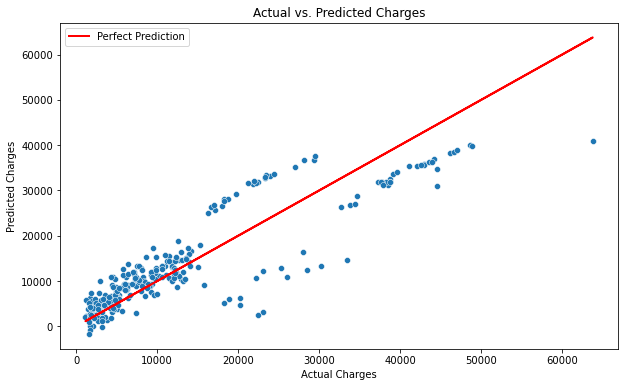

In [23]:
# Scatter plot of actual vs. predicted charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot(y_test, y_test, color='red', linewidth=2, label='Perfect Prediction')  # Adding perfect prediction line
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Charges')
plt.legend()
plt.show()

The scatter plot of actual versus predicted charges is a visual representation of the performance of the linear regression model in predicting insurance charges and helps to see the model's accuracy and reliability.

A tight clustering of points are around the diagonal line suggests that the model's predictions closely match the actual charges, indicating good predictive performance, but also may be room for improvement in the model since points are scattered widely away from the diagonal line from the 20000 actual charges and up.

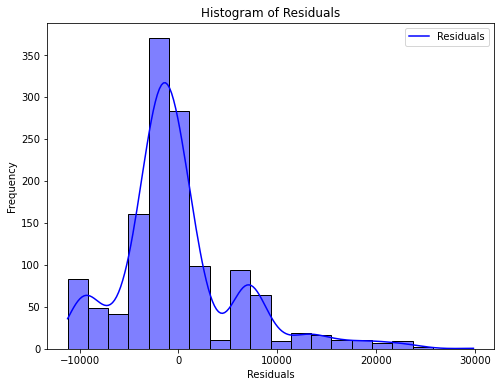

In [24]:
# Histogram of residuals

predicted_values = model.predict(X)
residuals = y - predicted_values #actual insurance charges - charges predicted by the linear regression model.


plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='blue', bins=20)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend(['Residuals'], loc='best')
plt.show()

The residuals are the differences between the actual insurance charges observed in the dataset and the charges predicted by the linear regression model.

By examining the histogram of residuals, we can see how well the linear regression model captures the patterns in the insurance_data. A symmetrically distributed histogram around zero with a bell-shaped curve suggests that the model's predictions align well with the actual data. Outliers or unusual patterns in the histogram may indicate areas where the model's performance can be improved or where the data may exhibit unexpected behavior.